# velocity of dwarf 1, without RT

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

from NFW_Z import NFW_Z

%matplotlib inline

In [2]:
dm_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/noRT/dwarf_dm_5e8_0290.txt")

dx_dm_290 = dm_290[:,4] / 1000 # converting pc to kpc
dy_dm_290 = dm_290[:,5] / 1000 # converting pc to kpc
dz_dm_290 = dm_290[:,6] / 1000 # converting pc to kpc
r_dm_290 = np.sqrt(dx_dm_290**2 + dy_dm_290**2 + dz_dm_290**2)

vx_dm_290 = dm_290[:,7]
vy_dm_290 = dm_290[:,8]
vz_dm_290 = dm_290[:,9]
vx_dm_COM = np.sum(vx_dm_290) / np.size(vx_dm_290)
vy_dm_COM = np.sum(vy_dm_290) / np.size(vy_dm_290)
vz_dm_COM = np.sum(vz_dm_290) / np.size(vz_dm_290)
vx_dm_new = vx_dm_290 - vx_dm_COM
vy_dm_new = vy_dm_290 - vy_dm_COM
vz_dm_new = vz_dm_290 - vz_dm_COM
v_dm_new = np.sqrt(vx_dm_new**2 + vy_dm_new**2 + vz_dm_new**2)

In [3]:
star_290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/velocity/dwarf1/noRT/dwarf_star_5e8_0290.txt")

dx_star_290 = star_290[:,4] / 1000 # converting pc to kpc
dy_star_290 = star_290[:,5] / 1000 # converting pc to kpc
dz_star_290 = star_290[:,6] / 1000 # converting pc to kpc
r_star_290 = np.sqrt(dx_star_290**2 + dy_star_290**2 + dz_star_290**2)

vx_star_290 = star_290[:,7]
vy_star_290 = star_290[:,8]
vz_star_290 = star_290[:,9]
vx_star_COM = np.sum(vx_star_290) / np.size(vx_star_290)
vy_star_COM = np.sum(vy_star_290) / np.size(vy_star_290)
vz_star_COM = np.sum(vz_star_290) / np.size(vz_star_290)
vx_star_new = vx_star_290 - vx_star_COM
vy_star_new = vy_star_290 - vy_star_COM
vz_star_new = vz_star_290 - vz_star_COM
v_star_new = np.sqrt(vx_star_new**2 + vy_star_new**2 + vz_star_new**2)

## CHAPTER 1:
## Speed of dark matter & star particles with respect to distance from dwarf center

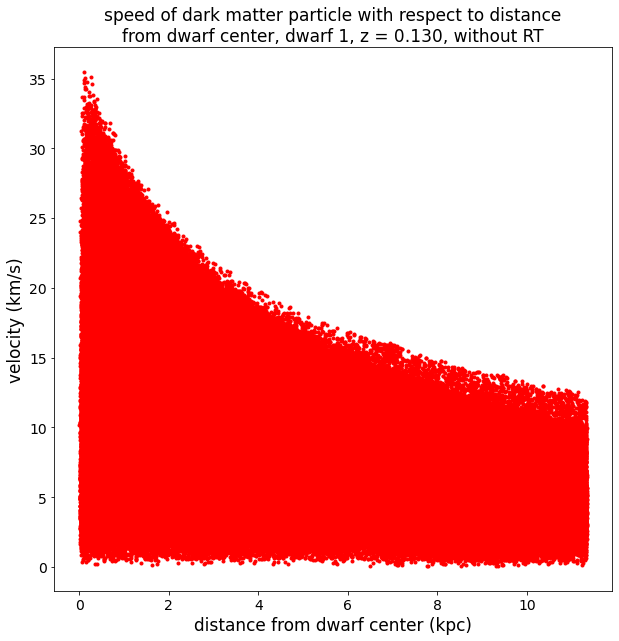

In [4]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_dm_290, v_dm_new, '.', color='red')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of dark matter particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

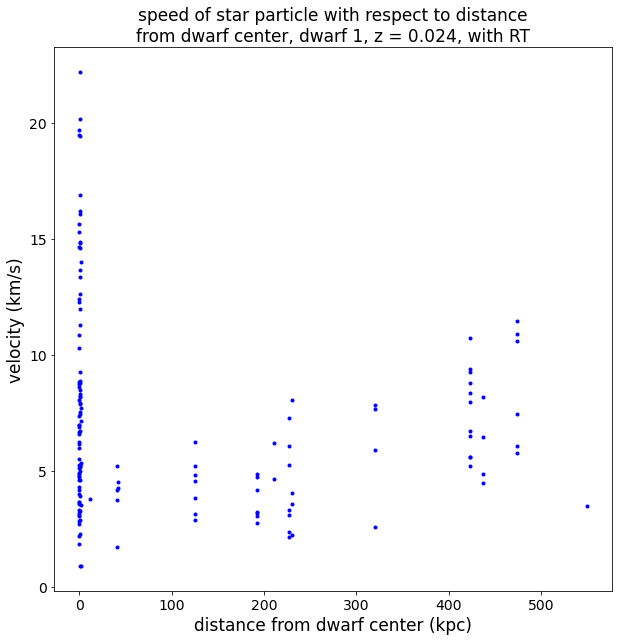

In [5]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(r_star_290, v_star_new, '.', color='blue')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.title('speed of star particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.024, with RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [6]:
'''Generate a radius array to work by later. unit: kpc'''

generated_array = np.arange(0.01, 11.3, 0.02)

In [7]:
'''Generate NFW fits based on different masses'''

NFW_1A = NFW_Z(3.13e8, 'Jeon')
r_s = NFW_1A.r_s(0.130, 30)
v_esc_1A = NFW_1A.v_esc(generated_array, 0.130, 30)

NFW_1B = NFW_Z(7.13e8, 'Jeon')
r_s = NFW_1B.r_s(0.130, 21)
v_esc_1B = NFW_1B.v_esc(generated_array, 0.130, 21)

NFW_1C = NFW_Z(1.11e9, 'Jeon')
r_s = NFW_1C.r_s(0.130, 19)
v_esc_1C = NFW_1C.v_esc(generated_array, 0.130, 19)

NFW_1D = NFW_Z(3.3e8, 'Jeon')
r_s = NFW_1D.r_s(0.130, 17)
v_esc_1D = NFW_1D.v_esc(generated_array, 0.130, 17)

NFW_Jeon = NFW_Z(1.9e8, 'Jeon')
r_s = NFW_Jeon.r_s(0.130, 30)
v_esc_Jeon = NFW_Jeon.v_esc(generated_array, 0.130, 30)

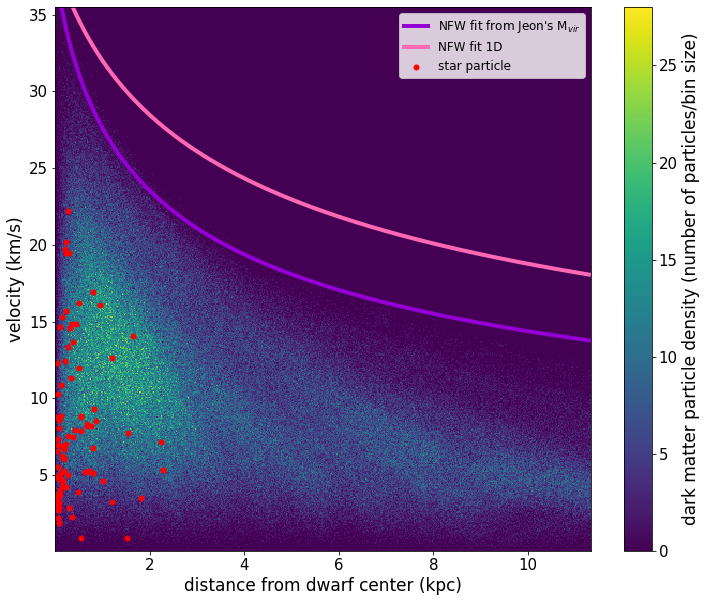

In [8]:
fig, ax = plt.subplots(figsize=[12, 10])

plt.hist2d(r_dm_290, v_dm_new, bins=500, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label(label='dark matter particle density (number of particles/bin size)', size=17)
cbar.ax.tick_params(labelsize=15)

plt.scatter(r_star_290, v_star_new, 25, color='red', label='star particle')
#plt.scatter(generated_array, v_esc_1A, 12, color='goldenrod', label='NFW fit 1A')
#plt.scatter(generated_array, v_esc_1B, 12, color='palevioletred', label='NFW fit 1B')
plt.plot(generated_array, v_esc_Jeon, linewidth=4, color='darkviolet', label="NFW fit from Jeon's M$_{vir}$")
plt.plot(generated_array, v_esc_1D, linewidth=4, color='hotpink', label='NFW fit 1D')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
#plt.title('speed of particle with respect to distance\nfrom dwarf center, dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=12)

plt.show()

## CHAPTER 2 
## Mean velocity and velocity dispersion profiles of dark matter particles

In [9]:
bin_size = 0.02

In [10]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

mean_vx = np.zeros(np.size(generated_array))
mean_vy = np.zeros(np.size(generated_array))
mean_vz = np.zeros(np.size(generated_array))

sigma_dm_vx = np.zeros(np.size(generated_array))
sigma_dm_vy = np.zeros(np.size(generated_array))
sigma_dm_vz = np.zeros(np.size(generated_array))

h = 0

for radius_value in generated_array:
    location = np.where((r_dm_290 < (radius_value + bin_size)))
    vx_values = vx_dm_new[location]
    vy_values = vy_dm_new[location]
    vz_values = vz_dm_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_vx[h] = np.mean(vx_array)
    mean_vy[h] = np.mean(vy_array)
    mean_vz[h] = np.mean(vz_array)
    sigma_dm_vx[h] = np.std(vx_array)
    sigma_dm_vy[h] = np.std(vy_array)
    sigma_dm_vz[h] = np.std(vz_array)
    h += 1

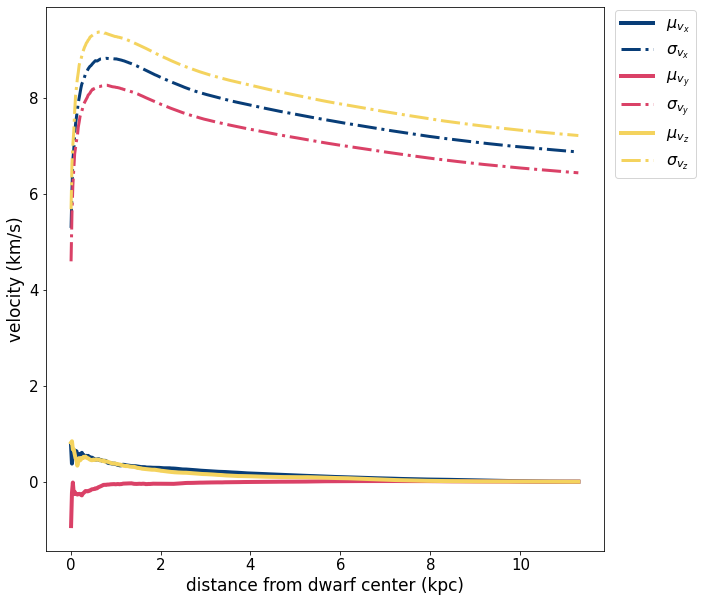

In [11]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(generated_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(generated_array, sigma_dm_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(generated_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(generated_array, sigma_dm_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(generated_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(generated_array, sigma_dm_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
#plt.xlim(0, 5)
#plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

## CHAPTER 3 
## Mean velocity and velocity dispersion profiles of star particles

In [12]:
'''Compute the mean velocity in spherical volumes, 
along with the corresponding standard deviation.'''

bin_size = 0.02

mean_star_vx = np.zeros(np.size(generated_array))
mean_star_vy = np.zeros(np.size(generated_array))
mean_star_vz = np.zeros(np.size(generated_array))

sigma_star_vx = np.zeros(np.size(generated_array))
sigma_star_vy = np.zeros(np.size(generated_array))
sigma_star_vz = np.zeros(np.size(generated_array))

j = 0

for radius_value in generated_array:
    location = np.where((r_star_290 < (radius_value + bin_size)))
    vx_values = vx_star_new[location]
    vy_values = vy_star_new[location]
    vz_values = vz_star_new[location]
    vx_array = np.array(vx_values)
    vy_array = np.array(vy_values)
    vz_array = np.array(vz_values)
    mean_star_vx[j] = np.mean(vx_array)
    mean_star_vy[j] = np.mean(vy_array)
    mean_star_vz[j] = np.mean(vz_array)
    sigma_star_vx[j] = np.std(vx_array)
    sigma_star_vy[j] = np.std(vy_array)
    sigma_star_vz[j] = np.std(vz_array)
    j += 1

C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\nguye\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


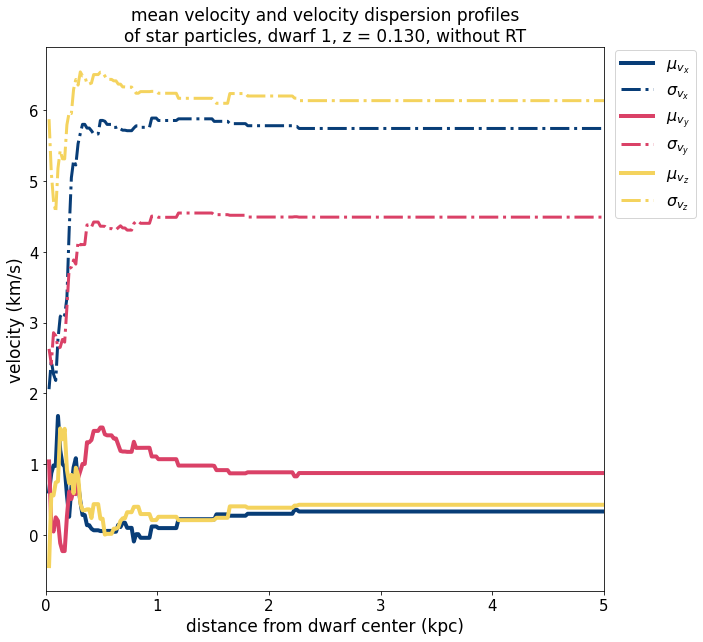

In [13]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(generated_array, mean_star_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(generated_array, sigma_star_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(generated_array, mean_star_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(generated_array, sigma_star_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(generated_array, mean_star_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(generated_array, sigma_star_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0,5)
plt.title('mean velocity and velocity dispersion profiles\nof star particles, dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

# CHAPTER 4 
## Mass profile of stars only. At which radius is the mass enclosed 1/2 of the total mass in stars?

In [14]:
'''Read in the star particle mass info.'''

star_mass_290 = star_290[:,11]

In [15]:
'''Generate the mass profile.'''

bin_size = 0.02

mass_prof_stars = np.zeros(np.size(generated_array))
h = 0
for radius_value in generated_array:
    particles = np.where((r_star_290 < (radius_value + bin_size)))
    masses_in_here = np.sum(star_mass_290[particles])
    mass_prof_stars[h] = masses_in_here
    h += 1

In [16]:
'''Where is the mass enclosed closest to 1/2 of the total star particle mass?'''

M_tot = mass_prof_stars[np.size(mass_prof_stars) - 1]
M_half = (1/2) * M_tot

print(M_half)

closest = (np.abs(mass_prof_stars - M_half)).argmin()
r_half = generated_array[closest]

8769.380500000001


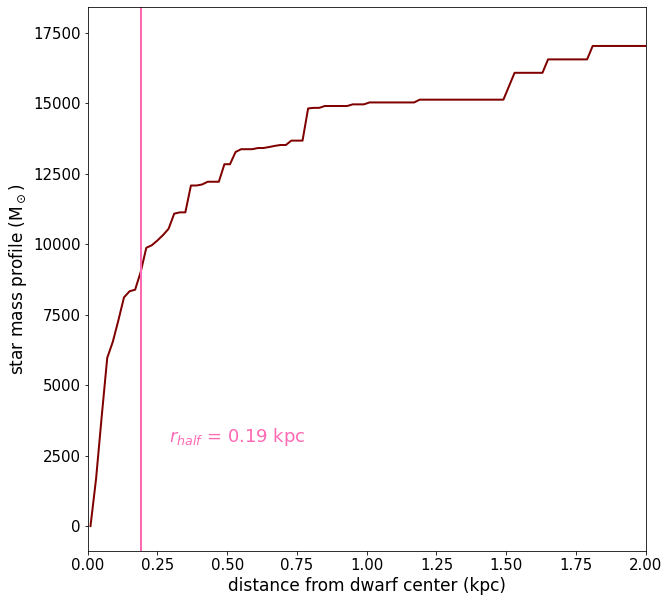

In [17]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(generated_array, mass_prof_stars, 'maroon', linewidth=2)

plt.axvline(r_half, color='hotpink', linewidth=2)

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('star mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xlim(0,2)
#plt.title('mass profile of only the stars\nin dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.text(r_half + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

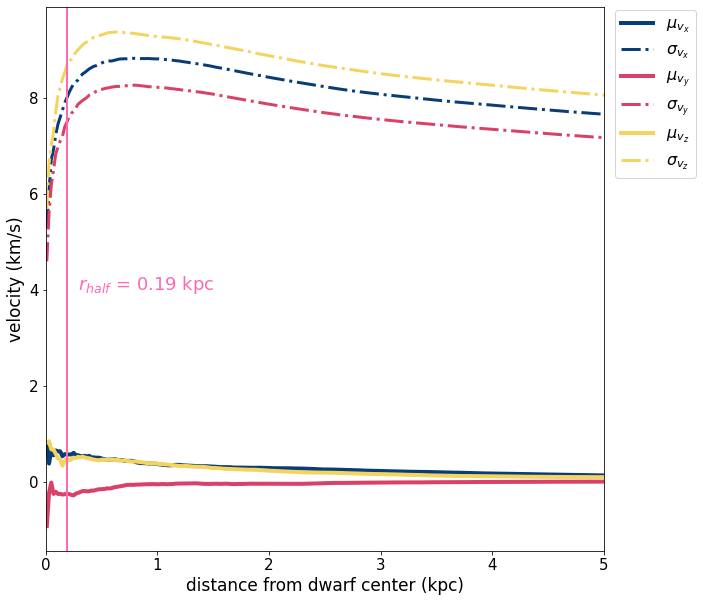

In [18]:
fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(generated_array, mean_vx, linewidth=4, color='#083D77', label='$\mu_{v_x}$')
plt.plot(generated_array, sigma_dm_vx, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
plt.plot(generated_array, mean_vy, linewidth=4, color='#DA4167', label='$\mu_{v_y}$')
plt.plot(generated_array, sigma_dm_vy, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
plt.plot(generated_array, mean_vz, linewidth=4, color='#F4D35E', label='$\mu_{v_z}$')
plt.plot(generated_array, sigma_dm_vz, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')

plt.axvline(r_half, color='hotpink', linewidth=2)
plt.text(r_half + 0.1, 4, '''$r_{half}$ = ''' + str(round(r_half, 3)) + ''' kpc''', fontsize=18, color='hotpink')

plt.xlabel('distance from dwarf center (kpc)', fontsize=17)
plt.ylabel('velocity (km/s)', fontsize=17) # using LATEX here!
plt.xlim(0, 5)
#plt.title('mean velocity and velocity dispersion profiles\nof dark matter particles, dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.18, 1.01), markerscale=2)

plt.show()

# CHAPTER 5
## As inferred from the velocity dispersion, find the mass enclosed within r<sub>half<sub>

In [19]:
'''Generate the mass profile from the dark matter particles.'''

mass_prof_dm = np.zeros(np.size(generated_array))
h = 0
for radius_value in generated_array:
    particles = np.where((r_dm_290 < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_prof_dm[h] = how_many_particles * 500
    h += 1

In [20]:
'''Find the velocity dispersion of the star and DM profiles within r_half.'''

sigma_star_vx_half = sigma_star_vx[closest]
sigma_star_vy_half = sigma_star_vy[closest]
sigma_star_vz_half = sigma_star_vz[closest]

print(sigma_star_vx_half)
print(sigma_star_vy_half)
print(sigma_star_vz_half)

sigma_dm_vx_half = sigma_dm_vx[closest]
sigma_dm_vy_half = sigma_dm_vy[closest]
sigma_dm_vz_half = sigma_dm_vz[closest]

print(sigma_dm_vx_half)
print(sigma_dm_vy_half)
print(sigma_dm_vz_half)

3.3469596200469542
3.2149520596055754
5.795196374844529
7.9941513947561305
7.491052769511733
8.67418441213982


In [28]:
G = 4.3009e-3 # pc*(km/s)^2 / Msun
M_real = mass_prof_dm[closest]

M_wolf = lambda sigma : 3 * (sigma)**2 * (r_half*1000) / G

M_half_x_wolf = M_wolf(sigma_star_vx_half)
M_half_y_wolf = M_wolf(sigma_star_vy_half)
M_half_z_wolf = M_wolf(sigma_star_vz_half)

M_ratio_x = M_half_x_wolf / M_real
M_ratio_y = M_half_y_wolf / M_real
M_ratio_z = M_half_z_wolf / M_real

#print(mass_prof_stars[closest])
print(mass_prof_dm[closest])
print(M_half_x_wolf)
print(M_half_y_wolf)
print(M_half_z_wolf)

#print(round(M_ratio_x, 3), round(M_ratio_y, 3), round(M_ratio_z, 3))

5995000.0
1484623.929407372
1369823.1870004914
4450940.868914964


In [22]:
M_real / mass_prof_stars[closest]

664.5948011503531

In [23]:
M_half_x_wolf / mass_prof_stars[closest]

164.58270978274365

In [24]:
M_half_y_wolf / mass_prof_stars[closest]

151.85610818611084

In [25]:
M_half_z_wolf / mass_prof_stars[closest]

493.42321296222184

In [26]:
#plt.plot(mass_prof_stars[closest] + mass_prof_dm[closest], M_half_x_wolf, 'o')